In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn

In [2]:
import gmaps
from config import gkey


# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [3]:
df=pd.read_csv('../csv/la_rest_types.csv', index_col=False)

In [4]:
# df.sample()
df.head(2)


,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,1.818551e+10,"602 W Glenoaks Blvd Glendale, CA 91202","mideastern, bbq, armenian,",Middle Eastern,4.0,349,34.159455,-118.267173,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,1.818551e+10,"602 W Glenoaks Blvd Glendale, CA 91202","mideastern, bbq, armenian,",Barbeque,4.0,349,34.159455,-118.267173,91202


In [5]:
df.zipcodes.str.startswith('9')
df.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
52292,VMB9FF4C6dyKLpAaMziMyA,El Pollo Loco,1.323589e+10,"2501 E Slauson Ave Huntington Park, CA 90255","mexican, hotdogs,",,1.5,101,33.989469,-118.227516,90255


In [6]:
# df=df[df.zipcodes.str.startswith('9')]

In [7]:
# df.isnull()

In [8]:
#get rid of nan values
df['category_title'].replace(' ', np.nan, inplace=True)

In [9]:
# df.isnull()

In [10]:
df.dropna(inplace=True)

In [11]:
df.reset_index(drop=True)
df.sample(2)

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
37281,nRNReA52TZXHQtvd7dvOdg,Ensoku Ramen,1.310315e+10,"2307 Main St Santa Monica, CA 90405","ramen,",Ramen,3.5,12,34.004830,-118.486140,90405
53791,WDfTd_2tRc4cgaipbfIcwg,Deluxe Waffle,1.424000e+10,"491 W 6th St San Pedro, CA 90731","waffles,",Waffles,5.0,3,33.738558,-118.287522,90731


In [12]:
# df.isnull()

In [13]:
df['rating'].value_counts()


4.0    12870
3.5     7694
4.5     7614
3.0     3816
2.5     2217
5.0     2072
2.0     1916
1.5      808
1.0      204
Name: rating, dtype: int64

In [14]:
# df['category_title'].value_counts(normalize=True)
rating=list(df['rating'].value_counts(bins=3))

In [15]:
rating

[22556, 13727, 2928]

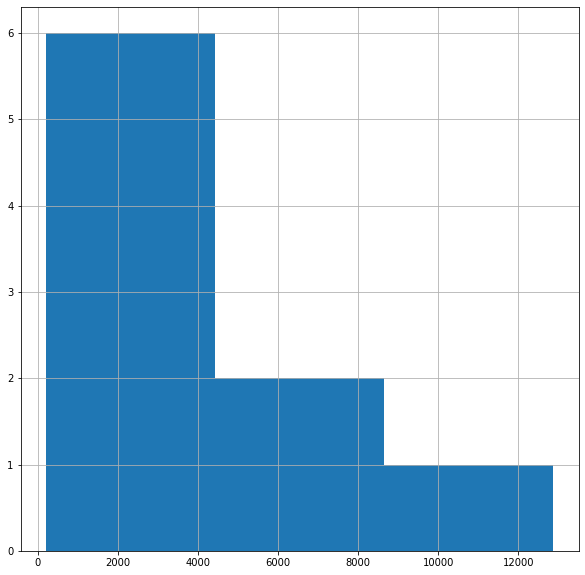

In [16]:
df['rating'].value_counts().hist(bins=3, figsize=(10,10))

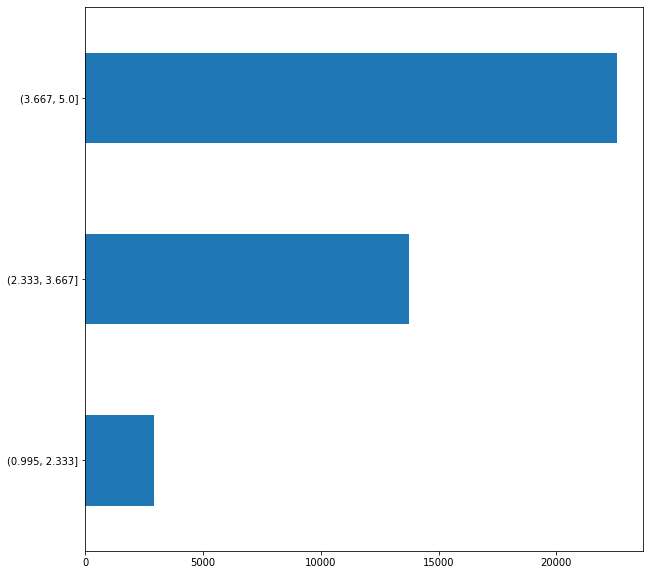

In [68]:
df.rating.value_counts(bins=3).sort_values().plot(kind = 'barh', figsize=(10,10)).get_figure().savefig('plots/bahr1.png')

In [18]:
cat_desc=df['category_title'].describe()

#cat_desc.value_counts()

In [19]:
 %matplotlib inline

In [20]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [21]:
desc=df.describe()
desc

,phone,rating,review_count,lat,lon
count,3.921100e+04,39211.000000,39211.000000,39211.000000,39211.000000
mean,1.459647e+10,3.704840,334.317717,33.983303,-118.228632
std,4.738712e+09,0.811754,549.540069,0.235245,1.229942
min,1.201844e+10,1.000000,1.000000,32.735255,-122.636364
25%,1.310559e+10,3.500000,48.000000,33.881325,-118.368086
50%,1.323754e+10,4.000000,154.000000,34.008663,-118.267230
75%,1.562984e+10,4.000000,404.000000,34.063780,-118.140630
max,4.420000e+11,5.000000,16955.000000,53.448678,-1.856684


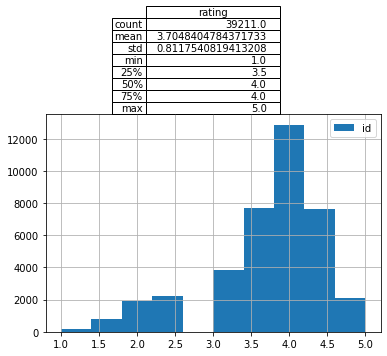

<Figure size 432x288 with 0 Axes>

In [72]:
fig, axes = plt.subplots(1,1)
axes = df['rating'].hist()

plt.legend(df.columns)
dfsummary = pd.DataFrame(df['rating'].describe())
plt.figsize=(12,12)
plt.table(cellText=dfsummary.values,
      colWidths = [0.4]*2,
      rowLabels=dfsummary.index,
      colLabels=dfsummary.columns,
      cellLoc = 'right', rowLoc = 'right',
      loc='top')

plt.show()
plt.savefig('plots/missing_rating.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1020e28c50>,
      dtype=object)

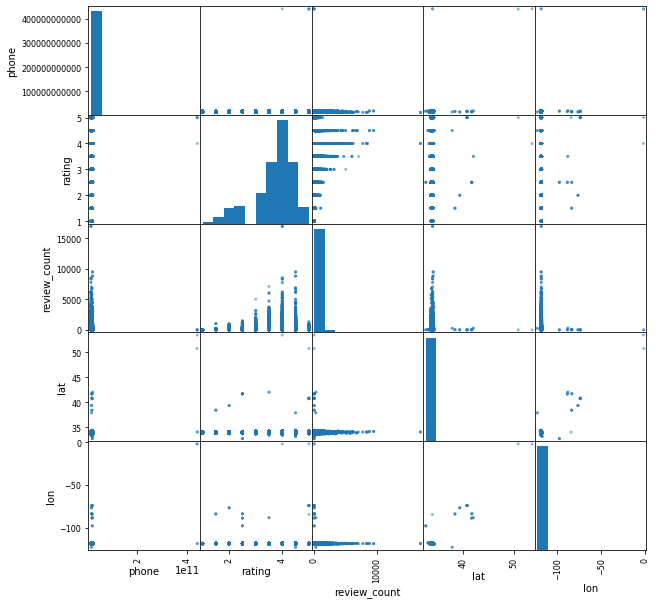

In [23]:
scatter_matrix(df, figsize=(10,10))

In [24]:
desc.groupby('rating')['review_count'].mean()

rating
0.811754          549.540069
1.000000            1.000000
3.500000           48.000000
3.704840          334.317717
4.000000          279.000000
5.000000        16955.000000
39211.000000    39211.000000
Name: review_count, dtype: float64

In [25]:
#filter on two conditons ex res = df[(df['B']<8) & (df['B']>2)]
s=df['rating'].between(2, 4, inclusive=False)
s[s].values[0:10]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

zipcodes        2713.0
review_count       1.0
rating             1.0
dtype: float64

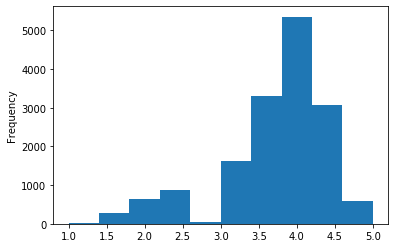

In [26]:
gr_zip = df.groupby(['zipcodes', 'review_count'])['rating'].median().reset_index()

gr_zip['rating'].plot(kind='hist')
gr_zip.min()


In [27]:
cat_title=df.groupby('category_title').rating.apply(lambda x: len(x[x>2.5])/len(x) )

In [28]:
cat_title.sample(3)


category_title
Cheese Shops    1.000000
Hot Pot         0.968750
Hawaiian        0.946903
Name: rating, dtype: float64

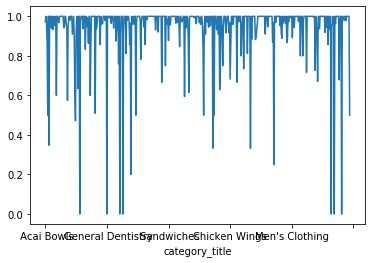

In [29]:
cat_title.plot()

In [30]:
means = df.groupby('zipcodes').mean()['rating']
means
# medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# summary_table = pd.DataFrame({"Mean Tumor Volume":means,
#                               "Median Tumor Volume":medians,
#                               "Tumor Volume Variance":variances,
#                               "Tumor Volume Std. Dev.":sds,
#                               "Tumor Volume Std. Err.":sems})

zipcodes
02713      3.500000
10314      3.000000
10476      5.000000
11222      5.000000
21206      2.000000
             ...   
94703      5.000000
94970      4.500000
95113      3.000000
CA         3.642857
Kingdom    4.750000
Name: rating, Length: 353, dtype: float64

In [31]:
medians = df.groupby('zipcodes').median()['rating']
medians

zipcodes
02713      3.5
10314      3.0
10476      5.0
11222      5.0
21206      2.0
          ... 
94703      5.0
94970      4.5
95113      3.0
CA         3.5
Kingdom    5.0
Name: rating, Length: 353, dtype: float64

In [32]:
revCount = df.groupby('zipcodes').sum()['review_count']
revCount


zipcodes
02713         2
10314        22
10476         9
11222        21
21206        51
           ... 
94703         1
94970       520
95113      2766
CA         2641
Kingdom       7
Name: review_count, Length: 353, dtype: int64

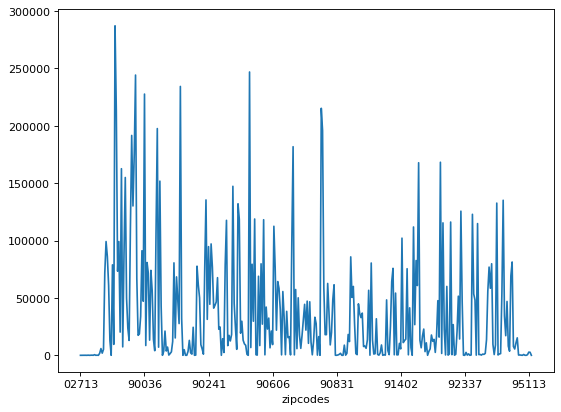

In [33]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
revCount.plot(kind='line')

In [34]:
# install seaborn
# %%bash
# pip install seaborn

In [35]:
means = df.groupby('zipcodes').mean()['rating']
means

zipcodes
02713      3.500000
10314      3.000000
10476      5.000000
11222      5.000000
21206      2.000000
             ...   
94703      5.000000
94970      4.500000
95113      3.000000
CA         3.642857
Kingdom    4.750000
Name: rating, Length: 353, dtype: float64

In [36]:
total_count = df.groupby('zipcodes').size()
total_count

zipcodes
02713       1
10314       1
10476       3
11222       3
21206       3
           ..
94703       1
94970       2
95113       3
CA         77
Kingdom     4
Length: 353, dtype: int64

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
 

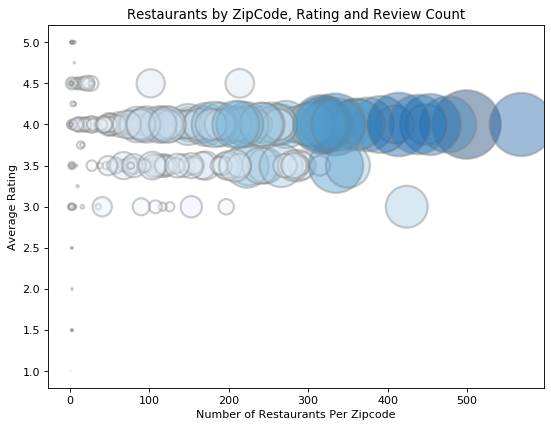

In [38]:
#medians plot

# create data
x = total_count
y = medians
z = revCount
# z=z*z
# z=z.sum()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)

plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

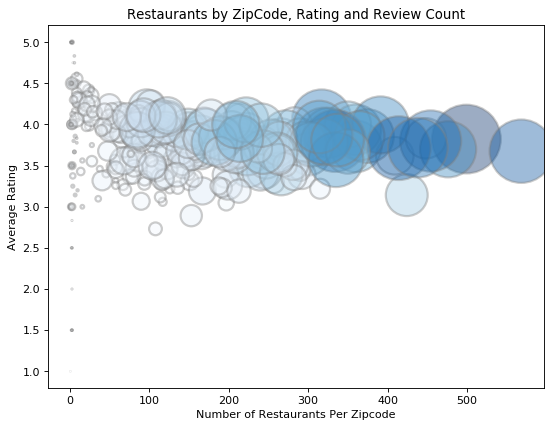

In [39]:

#means plot

# create data
x = total_count
y = means
z = revCount
# z=z*z
# z=z.sum()
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

In [40]:
g = df.groupby('zipcodes')
rest_zips = [name for name,unused_df in g]
# rest_zips

In [41]:
# rest_zip = df['zipcodes'].unique()
# rest_zip

In [42]:
summary_table = pd.DataFrame({"Avg":means,
                              "Med":medians,
                              "RevCnt":revCount,
                              "ZipCnt":total_count,
                              "Zips":rest_zips})
summary_table

,Avg,Med,RevCnt,ZipCnt,Zips
zipcodes,,,,,
02713,3.500000,3.5,2,1,02713
10314,3.000000,3.0,22,1,10314
10476,5.000000,5.0,9,3,10476
11222,5.000000,5.0,21,3,11222
21206,2.000000,2.0,51,3,21206
...,...,...,...,...,...
94703,5.000000,5.0,1,1,94703
94970,4.500000,4.5,520,2,94970
95113,3.000000,3.0,2766,3,95113


In [43]:
#type(summary_table)

avg_zip=summary_table.groupby('ZipCnt')
avg_zip.head()

,Avg,Med,RevCnt,ZipCnt,Zips
zipcodes,,,,,
02713,3.500000,3.5,2,1,02713
10314,3.000000,3.0,22,1,10314
10476,5.000000,5.0,9,3,10476
11222,5.000000,5.0,21,3,11222
21206,2.000000,2.0,51,3,21206
...,...,...,...,...,...
92843,4.112903,4.0,69174,93,92843
92844,4.109756,4.0,81343,123,92844
92845,3.925000,4.0,7745,40,92845


In [44]:
summary_table.sort_values(by=['ZipCnt'], ascending=False, inplace=True)


In [45]:
#90045 trends noticeably lower 
bad_zip=df[(df['zipcodes']=="90045") & (df['rating']<=3)]
bad_zip.head()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
81,_511GTZrG6CL9AZd23XhvQ,The Counter,1.424227e+10,"Terminal 7 World Way Los Angeles, CA 90045","burgers,",Burgers,2.0,184,33.941320,-118.399505,90045
150,_A7D9TxzfETE0b6cj4dCnw,Homeboy Cafe & Bakery,1.213503e+10,"400 World Way Los Angeles, CA 90045","seafood, foodtrucks, cafes,",Seafood,3.0,151,33.943368,-118.408164,90045
151,_A7D9TxzfETE0b6cj4dCnw,Homeboy Cafe & Bakery,1.213503e+10,"400 World Way Los Angeles, CA 90045","seafood, foodtrucks, cafes,",Food Trucks,3.0,151,33.943368,-118.408164,90045
152,_A7D9TxzfETE0b6cj4dCnw,Homeboy Cafe & Bakery,1.213503e+10,"400 World Way Los Angeles, CA 90045","seafood, foodtrucks, cafes,",Cafes,3.0,151,33.943368,-118.408164,90045
555,_MUPeYDPX8plaSnNPflSrg,Engine Co No 28,1.310847e+10,"800 World Way Terminal 8 Los Angeles, CA 90045","tradamerican, venues, wine_bars,",American (Traditional),3.0,235,33.941975,-118.397406,90045


In [46]:

lat=list(bad_zip['lat'])
lon=list(bad_zip['lon'])

zip(lat, lon)

coordinates = [x for x in zip(lat, lon)]
rest_name=bad_zip['name'].tolist()
categories=bad_zip['category_title'].tolist()

# Customize the size of the figure
figure_layout = {
    'width': '1000px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
name=[x for x in rest_name]
category=[x for x in categories]

info_box_content=[f"Restaurant name: {name}" for name in name] 
info_box_contents=[f"Restaurant name: {name}" for name in name] 
markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content)


# heat_layer = gmaps.heatmap_layer(coordinates, weights=badR['rating']-1.5, 
#                                  dissipating=False, max_intensity=1.5,
#                                  point_radius = .000008)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [47]:
rslt_df = summary_table[summary_table['RevCnt'] > 30] 
rslt_df.head()




,Avg,Med,RevCnt,ZipCnt,Zips
zipcodes,,,,,
90028,3.675176,4.0,244236,568,90028
90012,3.822645,4.0,287141,499,90012
90025,3.698529,4.0,191603,476,90025
90036,3.799559,4.0,227657,454,90036
90015,3.831473,4.0,99135,448,90015


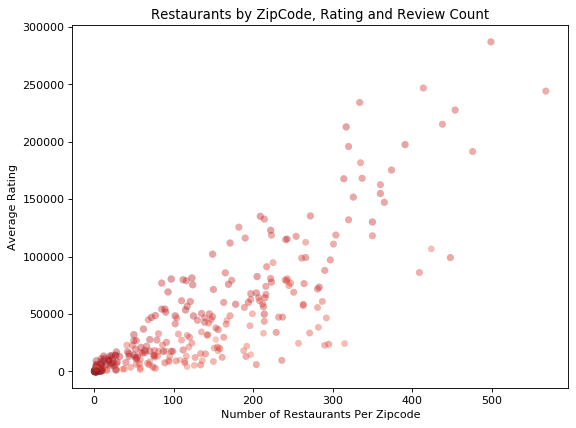

<Figure size 432x288 with 0 Axes>

In [73]:
# create data
x = total_count
y = revCount
z = means
# z=z*z
# z=z.sum()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*10, c=z, cmap="Reds", alpha=0.4, edgecolors="grey", linewidth=.25)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()
plt.savefig('plots/pink_scatter.png')

In [49]:
#datframe for all types of food
aT=pd.read_csv('../csv/LA_rest_yelp_no_dupes.csv')
aT.head()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,1.818551e+10,"602 W Glenoaks Blvd Glendale, CA 91202","mideastern, bbq, armenian,","Middle Eastern, Barbeque, Armenian,",4.0,349,34.159455,-118.267173
1,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,1.562499e+10,"2500 E Pacific Coast Hwy Long Beach, CA 90804","hotdogs, mexican,","Fast Food, Mexican,",2.0,89,33.789873,-118.162498
2,__cvgBooF6k2Ra0nA14NGg,Bottlefish,1.310955e+10,"11677 San Vicente Blvd Ste 200 Los Angeles, ...","bars, seafood,","Bars, Seafood,",4.5,274,34.054000,-118.464759
3,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,1.213747e+10,"1001 Maple Ave Ste 201 Los Angeles, CA 90015","seafood, mexican,","Seafood, Mexican,",3.0,49,34.038311,-118.254250
4,__GK0tVl6Dygt6BVn2TFrA,China Star Express,1.562494e+10,"1785 Palo Verde Ave Long Beach, CA 90815","chinese, hotdogs,","Chinese, Fast Food,",3.5,209,33.788383,-118.108055


In [50]:
zipcodes = list()

for item in aT['address']:
    zipcode = item.split()[-1]
    zipcodes.append(zipcode)

aT['zipcodes'] = zipcodes
aT = pd.DataFrame(aT)
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
1613,3YtKjdYnmXqOd3AcuT9Ezw,Mon Roll House,1.310394e+10,"1509 4th St Santa Monica, CA 90401","japanese, sushi,","Japanese, Sushi Bars,",3.5,374,34.014738,-118.492986,90401


In [51]:
list(aT[aT["zipcodes"]=='Kingdom']['address'])

['Suite 131  735 S Figueroa Street  Los Angeles 90017  United Kingdom',
 '243 Castle La West  Bournemouth BH8 9TG  United Kingdom',
 '181 Thornley La South  Stockport SK5 6QG  United Kingdom']

In [52]:
#verify that only Los Angeles locatins
# list(aT[aT["zipcodes"]=='CA']['address'])

In [53]:
aT=aT[aT.zipcodes.str.startswith('9')]
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
8978,ISLI9EHIihVJLFRJpkPh1g,Orange House Take Out,1.562694e+10,"2414 W Whittier Blvd La Habra, CA 90631","japanese,","Japanese,",4.0,177,33.939695,-117.973346,90631


In [54]:
#get restaurants with more than 100 reviews
aT=aT[aT["review_count"]>=100]

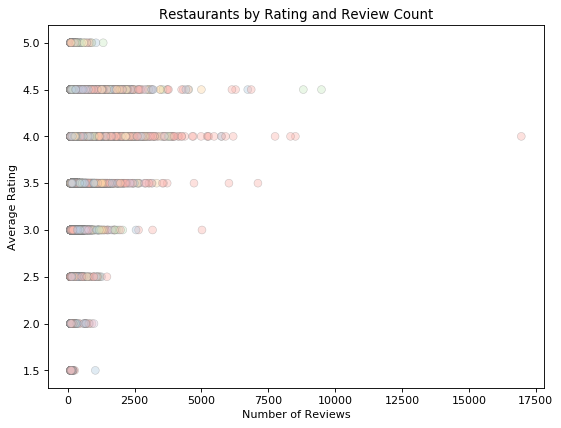

<Figure size 432x288 with 0 Axes>

In [74]:
x = aT["review_count"]
y = aT["rating"]
z = aT.zipcodes.astype(int)
# z=z*z
# z=z.sum()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=50, c=z, cmap="Pastel1", alpha=0.4, edgecolors="grey", linewidth=.5)
 
# Add titles (main and on axis)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.title("Restaurants by Rating and Review Count")
 
plt.show()
plt.savefig('plots/pink_brown.png')

In [75]:
aT[aT["review_count"]>=15000]

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
15773,TkFEKhsCixPWlShULKvMdQ,Bottega Louie,1.213802e+10,"700 S Grand Ave Los Angeles, CA 90017","italian, bakeries, breakfast_brunch,","Italian, Bakeries, Breakfast & Brunch,",4.0,16955,34.04693,-118.256601,90017


In [57]:
aT[aT["zipcodes"]=='90017'].mean()

phone           1.217504e+10
rating          3.698795e+00
review_count    7.163614e+02
lat             3.404958e+01
lon            -1.182615e+02
zipcodes                 inf
dtype: float64

In [58]:
aT.describe()

,phone,rating,review_count,lat,lon
count,1.064200e+04,10741.000000,10741.000000,10741.000000,10741.000000
mean,1.483958e+10,3.821758,503.393259,33.981854,-118.253166
std,2.036202e+09,0.579965,598.806651,0.133527,0.193931
min,1.201844e+10,1.500000,100.000000,33.662399,-122.636364
25%,1.310560e+10,3.500000,179.000000,33.870215,-118.383880
50%,1.424278e+10,4.000000,316.000000,34.017345,-118.280314
75%,1.626965e+10,4.000000,597.000000,34.076020,-118.113167
max,1.951456e+10,5.000000,16955.000000,37.895588,-117.750724


In [59]:
badR=aT[(aT["review_count"]>=500) & (aT["rating"]== 1.5)]
badR

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
8855,ILuXurLzw4N30I_RbPON2A,Buffalo Wild Wings,1.310437e+10,"736 East Del Amo Blvd Carson, CA 90746","chicken_wings, sportsbars, tradamerican,","Chicken Wings, Sports Bars, American (Traditio...",1.5,1032,33.847007,-118.262301,90746


In [60]:

lat=list(badR['lat'])
lon=list(badR['lon'])

zip(lat, lon)

coordinates = [x for x in zip(lat, lon)]


# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# heat_layer = gmaps.heatmap_layer(coordinates, weights=badR['rating']-1.5, 
#                                  dissipating=False, max_intensity=1.5,
#                                  point_radius = .000008)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [61]:
mediocre=aT[(aT["rating"]==2.5) &(aT["review_count"]>=300) ]
mediocre.head()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
273,_w3Senbs5ggKu__HU72vMQ,TGI Fridays,1.562420e+10,"7221 Carson Blvd Long Beach, CA 90808","tradamerican, bars, burgers,","American (Traditional), Bars, Burgers,",2.5,491,33.830900,-118.088440,90808
698,11NJTChkf0YUHZXBO0JHRA,Smashburger,1.213631e+10,"1011 S Figueroa St Ste B 101 Los Angeles, CA...","burgers,","Burgers,",2.5,622,34.044333,-118.265606,90015
1125,2EamcpRzQ27G2EOkCnGBvw,Buffalo Wild Wings,1.310542e+10,"3525 W Carson St Ste 163 Torrance, CA 90503","chicken_wings, tradamerican, sportsbars,","Chicken Wings, American (Traditional), Sports ...",2.5,862,33.833810,-118.347154,90503
1143,2GIpqnaSQageX3YgLb4E3Q,P.F. Chang's,1.310793e+10,"3525 Carson St Ste 166 Torrance, CA 90503","chinese,","Chinese,",2.5,531,33.833049,-118.347190,90503
1398,39NODk79ni7799xln_lIIw,Steak ’n Shake,1.310260e+10,"1455 3rd St Promenade Santa Monica, CA 90401","burgers, hotdogs, tradamerican,","Burgers, Fast Food, American (Traditional),",2.5,606,34.014650,-118.494548,90401


In [62]:
mediocre['category_title'].value_counts()

Mexican,                                                6
Mexican, Fast Food,                                     6
American (Traditional), Sports Bars, Burgers,           5
American (Traditional), Chicken Wings, Sports Bars,     4
American (Traditional), Tex-Mex, Bars,                  4
                                                       ..
Pizza, American (Traditional), Tapas Bars,              1
Latin American, Peruvian,                               1
Sushi Bars, Teppanyaki, Seafood,                        1
Sushi Bars, Japanese,                                   1
American (New), Breweries, Pizza,                       1
Name: category_title, Length: 62, dtype: int64

In [63]:

lat=list(mediocre['lat'])
lon=list(mediocre['lon'])

zip(lat, lon)

coordinates = [x for x in zip(lat, lon)]
rest_name=mediocre['name'].tolist()

# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
info_box_content=[f"Restaurant name: {name}" for name in rest_name]
markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )

# heat_layer = gmaps.heatmap_layer(coordinates, weights=badR['rating']-1.5, 
#                                  dissipating=False, max_intensity=1.5,
#                                  point_radius = .000008)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [64]:
bestR=aT[(aT["review_count"]>=500) & (aT["rating"]== 5)]
bestR.head(2)

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
1058,26qU1-u0hSYOjYDaqIcGPw,Yo-Way Eatery,1.424228e+10,"17901 S Vermont Ste D Gardena, CA 90248","juicebars, icecream, sandwiches,","Juice Bars & Smoothies, Ice Cream & Frozen Yog...",5.0,804,33.867865,-118.291121,90248
2247,6065vasIMEdNG72QYgxkKw,Churros Don Abel,1.562613e+10,"5468 Whittier Blvd East Los Angeles, CA 90022","mexican, streetvendors,","Mexican, Street Vendors,",5.0,637,34.019058,-118.151954,90022


In [65]:
bestR=aT[(aT["review_count"]>=500) & (aT["rating"]== 5)]

lat=list(bestR['lat'])
lon=list(bestR['lon'])

zip(lat, lon)
coordinates = [x for x in zip(lat, lon)]



# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
rest_name=bestR['name'].tolist()
# Assign the marker layer to a variable
info_box_content=[f"Restaurant name: {name}" for name in rest_name]
markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )
heat_layer = gmaps.heatmap_layer(coordinates, weights=bestR['rating']-5, 
                                 dissipating=False, max_intensity=5,
                                 point_radius = .018)
# Add the layer to the map
fig.add_layer(heat_layer)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [66]:
mapdf=aT[(aT["zipcodes"]=='90017') & (aT["rating"]>= 3.5)]

lat=list(mapdf['lat'])
lon=list(mapdf['lon'])

zip(lat, lon)
coordinates = [x for x in zip(lat, lon)]

# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
# markers = gmaps.marker_layer(coordinates)
heat_layer = gmaps.heatmap_layer(coordinates, weights=mapdf['rating']-3.5, 
                                 dissipating=False, max_intensity=1.5,
                                 point_radius = .0008)
# Add the layer to the map
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [67]:
mapdf=aT[(aT["zipcodes"]=='90017') & (aT["rating"]>= 3.5)]
mapdf

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
184,_n0fEUZdbkLOimHz_IXkiQ,JOEY DTLA,1.213373e+10,"700 W 7th St Ste S430 Los Angeles, CA 90017","newamerican,","American (New),",4.5,847,34.048001,-118.258108,90017
281,_wZoR5op0wysdkUi2r6o9g,Ebaes on Wilshire,1.213250e+10,"1111 Wilshire Blvd Ste 104 Los Angeles, CA 9...","asianfusion, sushi, ramen,","Asian Fusion, Sushi Bars, Ramen,",4.0,208,34.052791,-118.263669,90017
355,-73lYnIMpqXG5gVTQOpH8g,Public School 213,1.213622e+10,"612 Flower St Los Angeles, CA 90017","bars, newamerican, gastropubs,","Bars, American (New), Gastropubs,",3.5,873,34.049867,-118.257391,90017
514,0hZ9GIgr7ZOby-2N7WG4fQ,Cafe Teragram,1.213690e+10,1234 W 7th St The Teragram Ballroom Los Ange...,"bars, newamerican, breakfast_brunch,","Bars, American (New), Breakfast & Brunch,",4.5,285,34.051891,-118.266751,90017
853,1lxtw52CJ9ip6VqQCzt2Fw,The Burrow,1.213784e+10,"821 S Flower St Los Angeles, CA 90017","sandwiches, cocktailbars, gastropubs,","Sandwiches, Cocktail Bars, Gastropubs,",5.0,269,34.047010,-118.260820,90017
...,...,...,...,...,...,...,...,...,...,...,...
18728,y5by_vlxVBmvVXgr1HHguw,Miro,1.213989e+10,"888 Wilshire Blvd Los Angeles, CA 90017","italian, bars, pizza,","Italian, Bars, Pizza,",3.5,438,34.049792,-118.259187,90017
18787,yAF7K0yNT83e40hxnXtbjw,Shoo Shoo Baby,1.213689e+10,"717 W 7th St Los Angeles, CA 90017","bars, tradamerican,","Bars, American (Traditional),",4.0,128,34.048257,-118.258001,90017
19310,Z0GNWNB90vZs3W8xp8Mljg,Red Herring,1.213375e+10,"770 S Grand Ave Ste A Los Angeles, CA 90017","comfortfood, bars, newamerican,","Comfort Food, Bars, American (New),",4.5,269,34.046065,-118.256945,90017
19603,zKTUPHlZbIvGWUXbPsxABg,George's Greek Grill,1.213625e+10,"735 S Figueroa St Ste 131 Los Angeles, CA 90017","greek, mediterranean, burgers,","Greek, Mediterranean, Burgers,",3.5,450,34.049061,-118.260712,90017
